<a href="https://colab.research.google.com/github/nagae/ICL_B_2021/blob/main/efficient_reproduction_number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 必要なモジュールのインポート
import numpy as np # 行列計算
import pandas as pd # データベース
from matplotlib import pyplot as plt, dates as mdates # グラフ描画
import datetime # 日付
# ファイルを読み込み，列名を使いやすい形に修正
fname = 'https://toyokeizai.net/sp/visual/tko/covid19/csv/prefectures.csv'
jp_df = pd.read_csv(fname, dtype=str)
jp_df.columns = [ "年", "月" , "日", "都道府県", "Pref", "陽性数", "検査数", "入院数", "重症数", "退院数", "死亡数", "実効再生産数"]
# 都道府県名以外の全てのセルを整数値に変換する
for c in jp_df.columns:
    if c in ["都道府県", "Pref"]: # 都道府県名のデータは文字型として扱う
        jp_df[c] = jp_df[c].astype(str)
    else:
        jp_df[c] = pd.to_numeric(jp_df[c], errors='coerce') # 都道府県名以外のデータは数値として扱う
        jp_df[c] = jp_df[c].fillna(0) # データが欠損している部分を0で埋める
        jp_df[c] = jp_df[c].astype(float) # 一旦は実数型に変換する 
        if c not in ["実効再生産数"]: # 実効再生産数以外のデータは整数型として扱う
            jp_df[c] = jp_df[c].astype(int)

# 年月日の列からdatetime型のインデックスを生成する
jp_df["年月日"] = pd.to_datetime(jp_df[["年", "月", "日"]].astype(str).agg('-'.join, axis=1), format='%Y-%m-%d')
# 都道府県名と年月日からなるマルチインデックスを構築
jp_df = jp_df.set_index(["都道府県", "年月日"])
jp_df # jp_df の概観を表示

,,年,月,日,Pref,陽性数,検査数,入院数,重症数,退院数,死亡数,実効再生産数
都道府県,年月日,,,,,,,,,,,
東京都,2020-02-08,2020,2,8,Tokyo,3,0,0,0,0,0,0.00
神奈川県,2020-02-08,2020,2,8,Kanagawa,1,0,0,0,0,0,0.00
東京都,2020-02-09,2020,2,9,Tokyo,3,0,0,0,0,0,0.00
神奈川県,2020-02-09,2020,2,9,Kanagawa,1,0,0,0,0,0,0.00
東京都,2020-02-10,2020,2,10,Tokyo,3,0,0,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
熊本県,2021-05-22,2021,5,22,Kumamoto,5834,75676,907,27,4837,90,1.02
大分県,2021-05-22,2021,5,22,Oita,3137,138460,611,5,2489,37,0.69
宮崎県,2021-05-22,2021,5,22,Miyazaki,2939,38919,306,7,2594,25,0.68


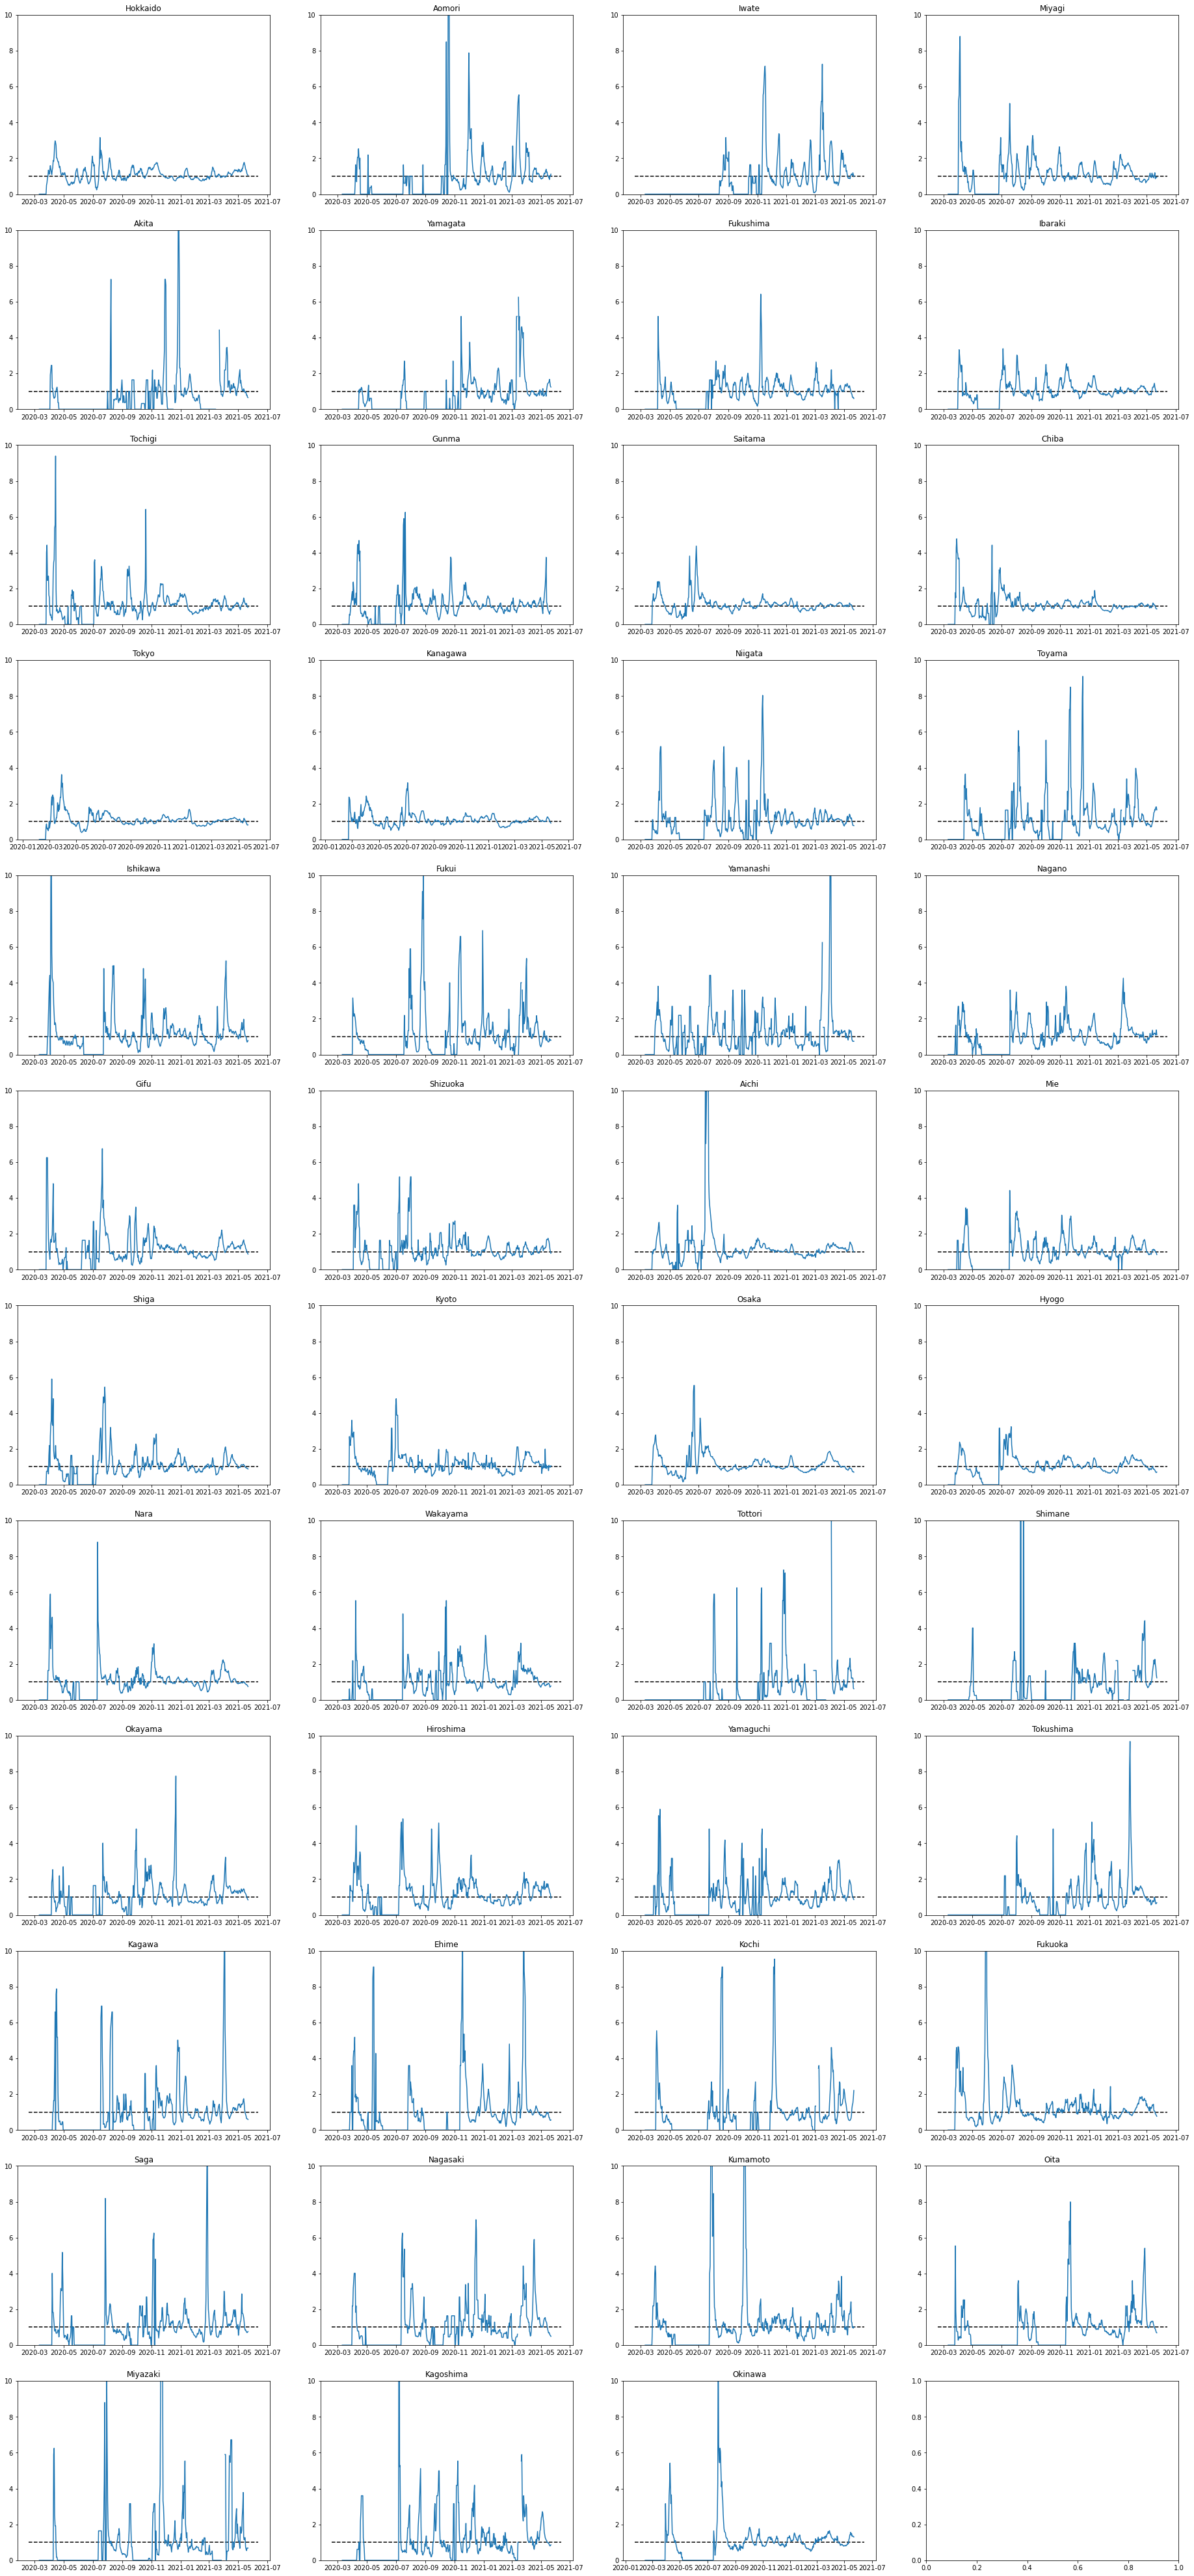

In [53]:
Re = jp_df["実効再生産数"]
pref_set = jp_df.tail(47).index.get_level_values(0).to_list() # 全県リスト
#pref_set = ["宮城県","東京都", "神奈川県"]
cols = 4 # 4列
rows = np.ceil(len(pref_set) / cols).astype(int)
fig, ax = plt.subplots(rows, cols, figsize=(8*cols,6*rows))
for pid, pref in enumerate(pref_set):
    c, r = pid%cols, pid//cols
    # subplot で行/列が1つしかない場合の対応
    if rows > 1 and cols > 1:
        ax1 = ax[r][c]
    elif rows > 1:
        ax1 = ax[r]
    elif cols > 1:
        ax1 = ax[c]
    else:
        ax1 = ax
    # 実効再生産数をプロット
    ax1.plot(Re.loc[pref])
    ax1.set_ylim((0,10)) # y軸を同じ高さに揃える
    ax1.set_title(jp_df.groupby("都道府県").last().loc[pref]["Pref"]) # 件名をタイトルにつける
    ax1.hlines(1.0,*ax1.get_xlim(), linestyle='--')
plt.show()